In [141]:
import gzip
import csv
from datetime import datetime, timedelta
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [142]:
def dict_to_csv(dico):
    return [{'Month':k[0],'Year':k[1],'AlterCount':v} for k,v in dico.items()]

In [143]:
def add_values_to_dict(dico,key,val):
    if key in dico.keys():
        dico[key] = dico[key] + val
    else:
        dico[key] = val
    return dico

In [144]:
def timestamp_add_one_year(timestamp):
    return timestamp + + 12*30*24*3600

In [145]:
def timestamp_add_one_month(timestamp):
    return timestamp + 30*24*3600

In [146]:
def delta(recent, dico, start,end):
    timestamp = start
    while timestamp < end:
        datetimet = datetime.fromtimestamp(timestamp)
        month_year = (datetimet.month,datetimet.year)
        if month_year in dico_time_ancient:
            recent -= dico[month_year]
        timestamp = timestamp_add_one_month(timestamp)
    return recent

In [147]:
dico_time_ancient = dict()
dico_time = dict()
dico_alter = dict()

In [148]:
filegz = gzip.open('sample_data/0a0a076ff04b3663aa821ff2a0b2c41a.csv.gz', 'rt')

In [149]:
csvobj = csv.reader(filegz,delimiter = ',',quotechar="'")

In [150]:
header = next(csvobj)
first_row = next(csvobj)
id_ego = first_row[0]
time_start = int(first_row[2])
last_time = time_start + 30*24*3600
recent = 0

In [151]:
for row in csvobj:
    idr,timestamp = row[0],int(row[2])
    if idr not in dico_alter:
        dico_alter[idr] = timestamp
        recent = recent + 1
        datetime_timestamp = datetime.fromtimestamp(timestamp)
        month_year = (datetime_timestamp.month,datetime_timestamp.year)
        month_year_one_year = (datetime_timestamp.month,datetime_timestamp.year+1)
        dico_time_ancient = add_values_to_dict(dico_time_ancient,month_year_one_year,1)
        if timestamp > last_time:
            recent = delta(recent,dico_time_ancient,timestamp_add_one_year(last_time),timestamp_add_one_year(timestamp))
            dico_time[month_year] = recent
            last_time = timestamp_add_one_month(time_start)
        dico_time[month_year] = recent
        time_start = timestamp


In [152]:
print(dico_time)

{(1, 2009): 2, (2, 2009): 3, (4, 2009): 3, (10, 2009): 2, (11, 2009): 5, (12, 2009): 3, (1, 2010): 3, (3, 2010): 5, (4, 2010): 5, (5, 2010): 5, (6, 2010): 7, (7, 2010): 10, (9, 2010): 5, (10, 2010): 10, (11, 2010): 10, (12, 2010): 11, (1, 2011): 15, (2, 2011): 10, (3, 2011): 9, (4, 2011): 8, (5, 2011): 9, (6, 2011): 10, (7, 2011): 10, (8, 2011): 10, (9, 2011): 10, (10, 2011): 11, (11, 2011): 11, (12, 2011): 12, (1, 2012): 9, (10, 2012): 9, (11, 2012): 8, (12, 2012): 9, (1, 2013): 6, (2, 2013): 7, (5, 2013): 8, (10, 2013): 8, (12, 2013): 7, (6, 2014): 96, (7, 2014): 97, (8, 2014): 97, (10, 2014): 97, (11, 2014): 95, (1, 2015): 96, (2, 2015): 96}


In [153]:
print(dico_time_ancient)

{(1, 2010): 2, (2, 2010): 1, (4, 2010): 1, (10, 2010): 2, (11, 2010): 3, (12, 2010): 3, (1, 2011): 2, (3, 2011): 4, (4, 2011): 2, (5, 2011): 2, (6, 2011): 6, (7, 2011): 5, (9, 2011): 2, (10, 2011): 5, (11, 2011): 9, (12, 2011): 2, (1, 2012): 6, (2, 2012): 1, (3, 2012): 3, (4, 2012): 4, (5, 2012): 8, (6, 2012): 4, (7, 2012): 4, (8, 2012): 3, (9, 2012): 3, (10, 2012): 6, (11, 2012): 1, (12, 2012): 2, (1, 2013): 2, (10, 2013): 2, (11, 2013): 1, (12, 2013): 4, (1, 2014): 1, (2, 2014): 2, (5, 2014): 3, (10, 2014): 1, (12, 2014): 1, (6, 2015): 92, (7, 2015): 1, (8, 2015): 1, (10, 2015): 2, (11, 2015): 2, (1, 2016): 3, (2, 2016): 8}


In [154]:
csv_file = id_ego + '_alter-count.csv'
csv_columns = ['Month','Year','AlterCount']
dict_data = dict_to_csv(dico_time)

In [155]:
try:
    with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for data in dict_data:
            writer.writerow(data)
except IOError:
        print("I/O error")

In [156]:
dico_df = pd.DataFrame.from_dict(dict_data)

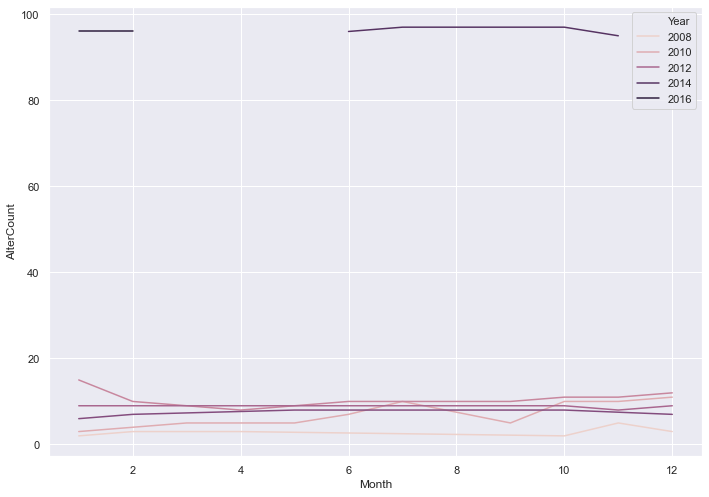

In [157]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.lineplot(x="Month", y="AlterCount",hue="Year",data=dico_df)